## Pandas

### Instructions

This assignment will be done completely inside this Jupyter notebook with answers placed in the cell provided.

All python imports that are needed shown.

Follow all the instructions in this notebook to complete these tasks.    

Make sure the CSV data files is in the same folder as this notebook - alumni.csv


In [2]:
# Imports needed to complete this exam

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Question 1 :  Import CSV file (1 Mark)


Write code to load the alumni csv dataset into a Pandas DataFrame called 'alumni'.


In [3]:
#q1 (1)
alumni = pd.read_csv ('alumni.csv')
alumni

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"
...,...,...,...,...,...,...,...,...
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"


### Question 2 :  Understand the data set (5 Marks)

Use the following pandas commands to understand the data set: a) head, b) tail, c) dtypes, d) info, e) describe 

In [4]:
#a) (1)
alumni.head ()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


In [5]:
#b) (1)
alumni.tail()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


In [6]:
#c) (1)
alumni.dtypes

Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object

In [7]:
#d) (1)
alumni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
Year Graduated    88 non-null int64
Gender            88 non-null object
Marital Status    88 non-null object
Diploma Type      88 non-null object
Defaulted         88 non-null object
Salary            88 non-null int64
Fee               88 non-null int64
Savings ($)       88 non-null object
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


In [8]:
#e) (1)
alumni.describe()

,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


In [9]:
alumni ['Savings ($)']


0      $86,000
1     $116,000
2      $52,000
3      $76,000
4      $52,000
        ...   
83     $16,000
84     $72,000
85     $46,000
86     $32,000
87     $67,000
Name: Savings ($), Length: 88, dtype: object

### Question 3 :  Cleaning the data set - part A (3 Marks)

a) Use clean_currency method below to strip out commas and dollar signs from Savings ($) column and put into a new column called 'Savings'.

In [10]:
def clean_currency(curr):
    return float (curr.replace(",", "").replace("$", ""))

clean_currency("$66,000")
 

66000.0

b) Uncomment 'alumni.dtypes.Savings' to check that the type change has occurred

In [11]:
#a) (2)
alumni['Savings']= alumni['Savings ($)'].apply(clean_currency)

In [12]:
#b) (1)
alumni.dtypes.Savings

dtype('float64')

### Question 4 :  Cleaning the data set - part B (5 Marks)

a) Run the 'alumni["Gender"].value_counts()' to see the incorrect 'M' fields that need to be converted to 'Male'

In [13]:
# a) (1)
alumni['Gender'].value_counts()

Male      46
Female    39
M          3
Name: Gender, dtype: int64

b) Now use a '.str.replace' on the 'Gender' column to covert the incorrect 'M' fields. Hint: We must use ^...$ to restrict the pattern to match the whole string. 

In [14]:
# b) (1)

gender = alumni['Gender'].str.replace ('^M$','Male')

c) That didn't the set alumni["Gender"] column however. You will need to update the column when using the replace command 'alumni["Gender"]=<replace command>', show how this is done below

In [15]:
# c) (1)
alumni["Gender"] = gender

d) You can set it directly by using the df.loc command, show how this can be done by using the 'df.loc[row_indexer,col_indexer] = value' command to convert the 'M' to 'Male'

In [16]:
# d) (1)
name = alumni.loc[[84],['Gender']]

e) Now run the 'value_counts' for Gender again to see the correct columns - 'Male' and 'Female' 

In [17]:
# e) (1)
alumni["Gender"].value_counts()

Male      49
Female    39
Name: Gender, dtype: int64

### Question 5 :  Working with the data set (4)

a) get the median, b) mean and c) standard deviation for the 'Salary' column

In [18]:
# a)(1)
alumni["Salary"].median ()

75000.0

In [19]:
# b)(1)
alumni["Salary"].mean ()

84090.90909090909

In [20]:
# c)(1)
alumni["Salary"].std ()

21234.128008173615

d) identify which alumni paid more than $15000 in fees, using the 'Fee' column

In [21]:
# d) (1)
al_over_15000 = alumni[alumni["Fee"]> 15000]
al_over_15000

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
18,2006,Male,Married,Standard Diploma,No,140000,20960,"$72,000",72000.0


In [22]:
alumni.describe()

,Year Graduated,Salary,Fee,Savings
count,88.000000,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273,47954.545455
std,1.560852,21234.128008,1110.647949,28324.437721
min,2004.000000,35000.000000,10869.000000,6000.000000
25%,2005.000000,75000.000000,10968.000000,30000.000000
50%,2006.500000,75000.000000,11696.000000,46000.000000
75%,2008.000000,90000.000000,12058.250000,67000.000000
max,2009.000000,160000.000000,20960.000000,146000.000000


### Question 6 :  Visualise the data set (4 Marks)

a) Using the 'Diploma Type' column, plot a bar chart and show its value counts.

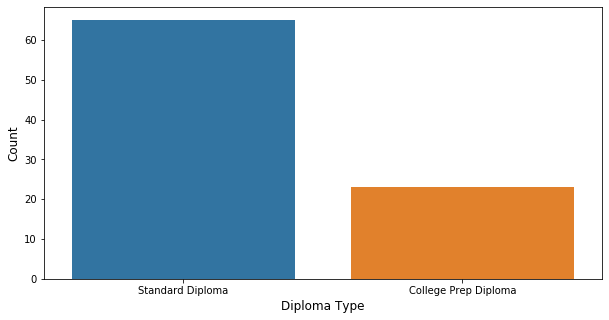

In [29]:
#a) (1)

alumni.rename(columns = {'Diploma Type': 'Diploma_Type'}, inplace= True)
plt.figure(figsize=(10,5))
sns.countplot(x='Diploma_Type', data=alumni)
plt.xlabel('Diploma Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

b) Now create a box plot comparison between 'Savings' and 'Salary' columns

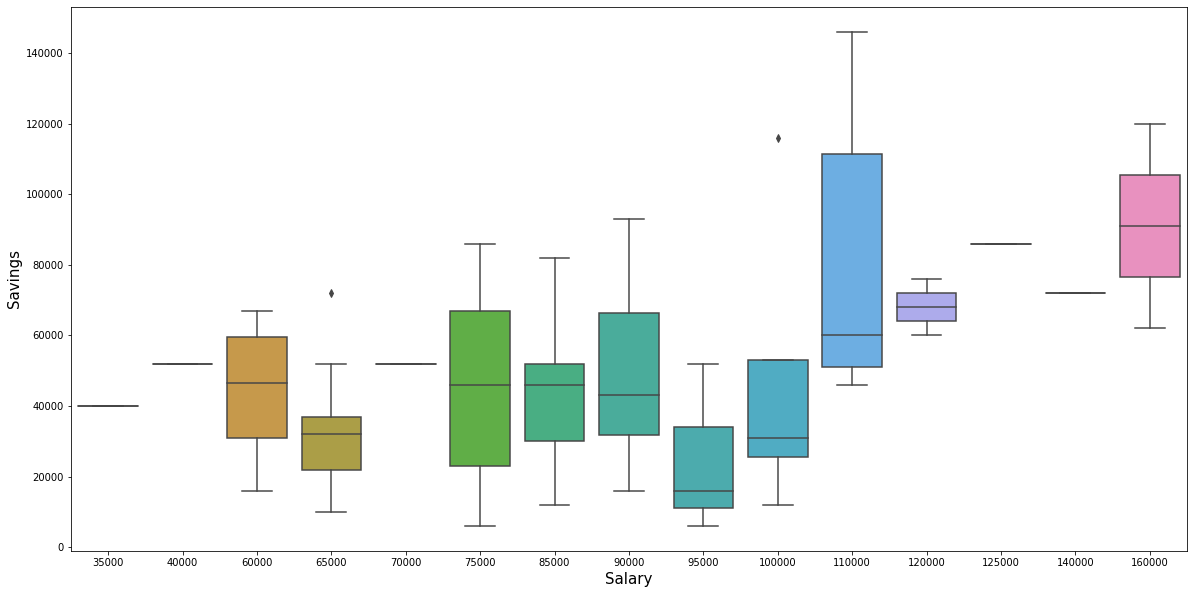

In [37]:
#b) (1)
plt.figure(figsize=(20,10))
sns.boxplot(x="Salary", y="Savings", data=alumni)
plt.title= 'Attrition by Distance and JobRole'
plt.xlabel('Salary',fontsize=15)
plt.ylabel('Savings',fontsize=15)
plt.show()


c) Generate a histogram with the 'Salary' column and use 12 bins.

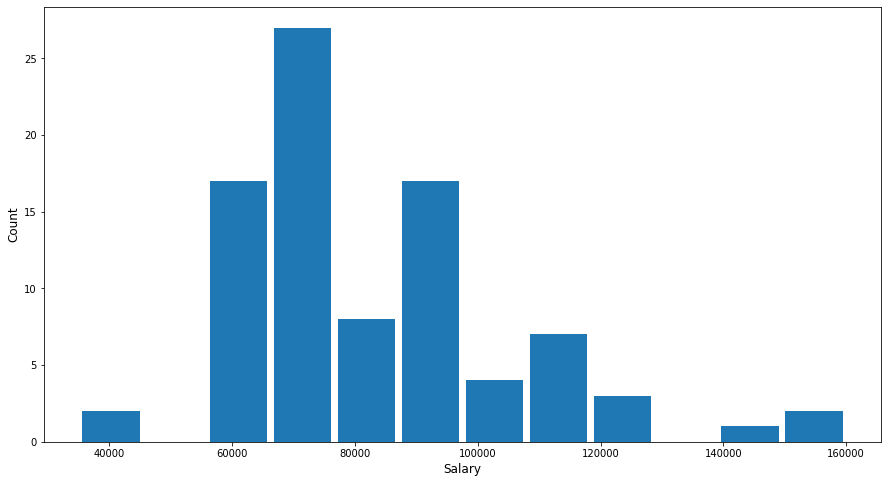

In [61]:
#c) (1)

plt.figure(figsize=(15,8))
salary = alumni['Salary']
bins = 12
plt.hist (salary, bins, histtype='bar', rwidth=0.9)
plt.xlabel('Salary',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()


d) Generate a scatter plot comparing 'Salary' and 'Savings' columns.

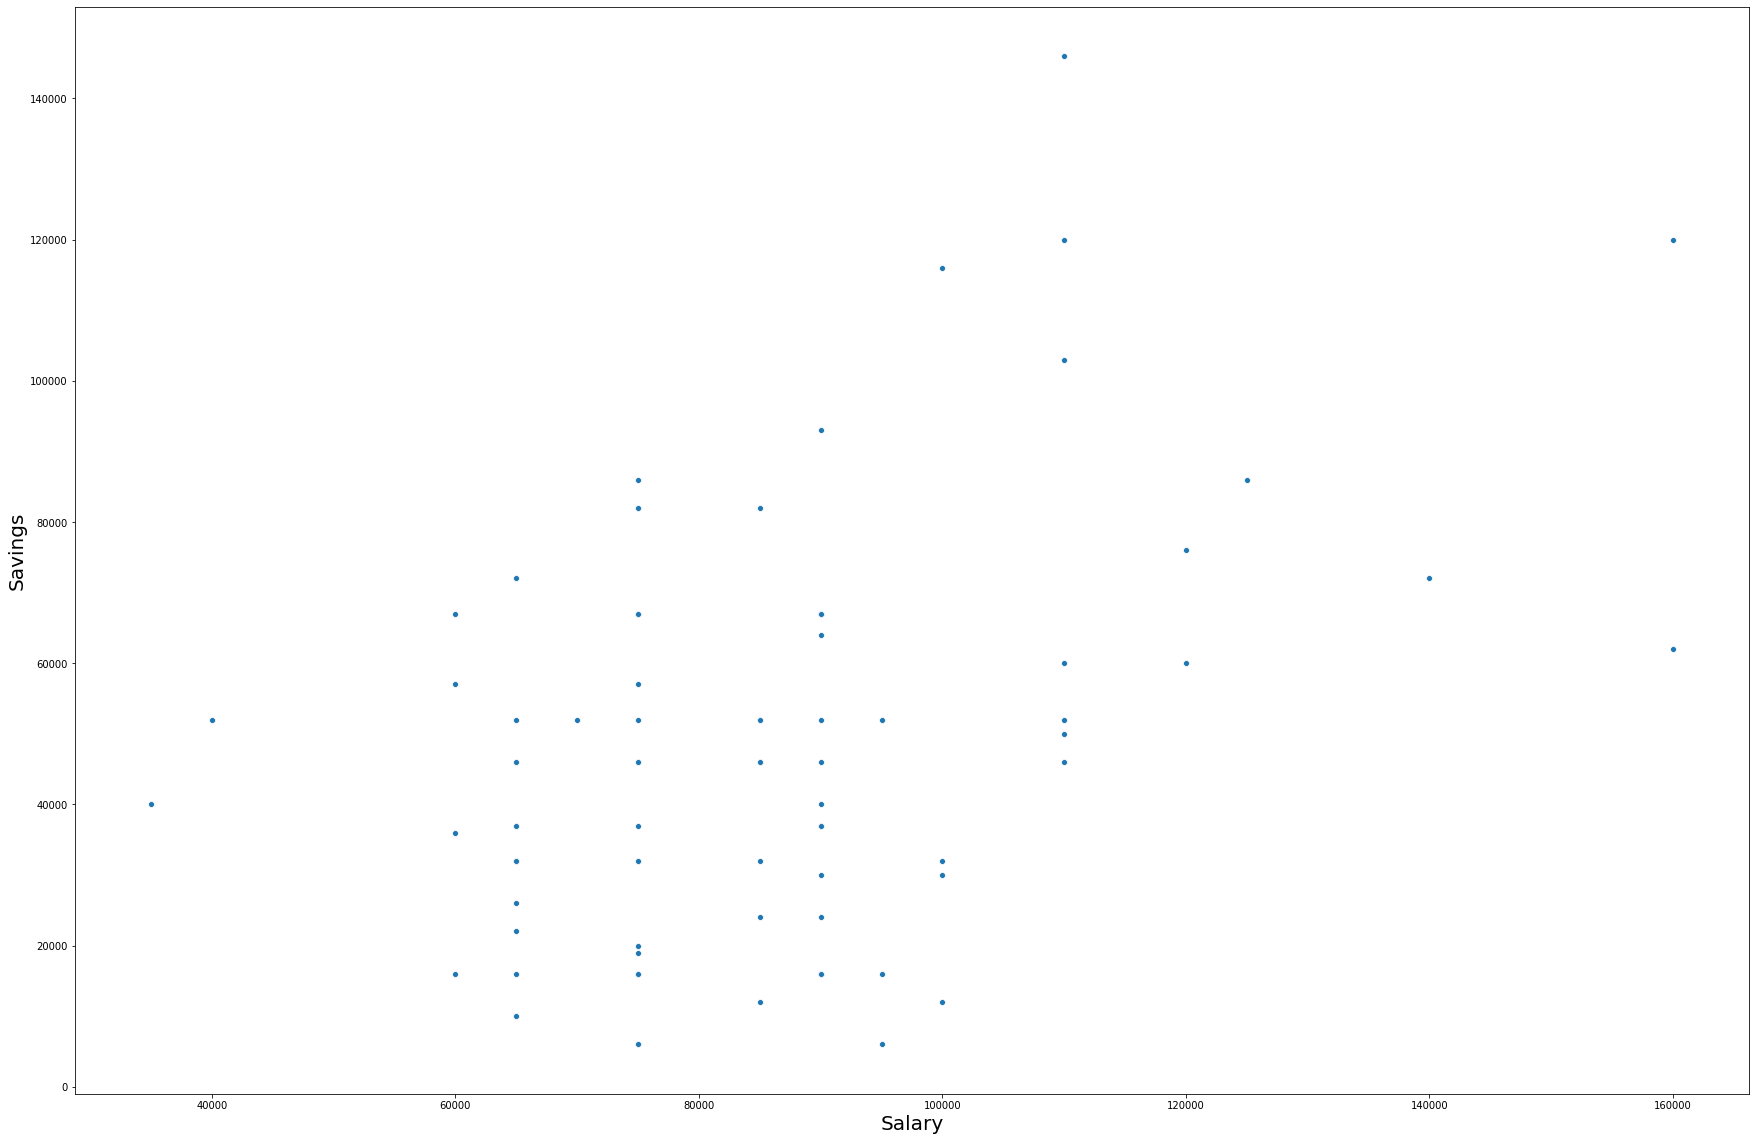

In [58]:
#d) (1)

plt.figure(figsize=(30,20))
x = alumni['Salary']
y = alumni['Savings']
sns.scatterplot(data=alumni, x=x, y=y)
plt.xlabel('Salary', fontsize=20)
plt.ylabel('Savings', fontsize=20)
plt.show()


### Question 7 :  Contingency Table (2 Marks)

Using both the 'Martial Status' and 'Defaulted' create a contingency table. Hint: crosstab

In [130]:
# Q7 (2)
f1 = alumni['Marital Status']
f2 = alumni['Defaulted']

pd.crosstab (f1,f2)

Defaulted,No,Yes
Marital Status,,
Divorced,8,11
Married,19,16
Single,9,25


In [75]:
#another method

pd.crosstab(index= alumni['Marital Status'], columns = alumni['Defaulted'])

Defaulted,No,Yes
Marital Status,,
Divorced,8,11
Married,19,16
Single,9,25
